# About This project

#### The purpose of this project is to answer all these 20 questions about olympic games history. 

#### List of all these 20 queries mentioned below:
1. How many olympics games have been held?
2. List down all Olympics games held so far.
3. Mention the total no of nations who participated in each olympics game?
4. Which year saw the highest and lowest no of countries participating in olympics?
5. Which nation has participated in all of the olympic games?
6. Identify the sport which was played in all summer olympics.
7. Which Sports were just played only once in the olympics?
8. Fetch the total no of sports played in each olympic games.
9. Fetch details of the oldest athletes to win a gold medal.
10. Find the Ratio of male and female athletes participated in all olympic games.
11. Fetch the top 5 athletes who have won the most gold medals.
12. Fetch the top 5 athletes who have won the most medals (gold/silver/bronze).
13. Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.
14. List down total gold, silver and broze medals won by each country.
15. List down total gold, silver and broze medals won by each country corresponding to each olympic games.
16. Identify which country won the most gold, most silver and most bronze medals in each olympic games.
17. Identify which country won the most gold, most silver, most bronze medals and the most medals in each olympic games.
18. Which countries have never won gold medal but have won silver/bronze medals?
19. In which Sport/event, India has won highest medals.
20. Break down all olympic games where india won medal for Hockey and how many medals in each olympic games.

#### I got the idea from this blog post: https://techtfq.com/blog/practice-writing-sql-queries-using-real-dataset

#### The link to the data set is this one: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

#### New challenging questions and ideas are welcome.

## 120 Years of Olympic Games

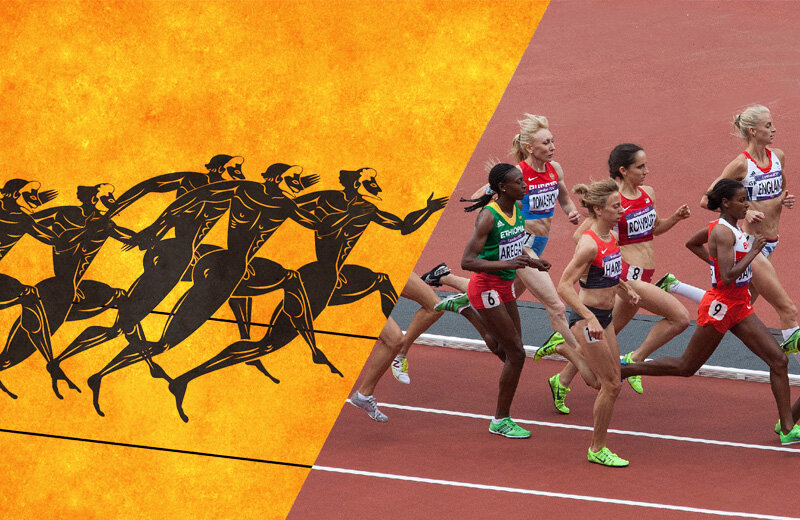

In [1]:
# Let's import the project's cover image
from PIL import Image
image = Image.open("/work/cover_image.jpg")
image.show()

## Extraction

### Athlete Events

In [2]:


athlete_events = _deepnote_execute_sql("""SELECT *
FROM 'athlete_events.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179,89,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA
271112,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NA
271113,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NA
271114,135571,Tomasz Ireneusz ya,M,30,185,96,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA


### Countries

In [3]:


noc_regions = _deepnote_execute_sql("""SELECT *
FROM 'noc_regions.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
noc_regions

,column0,column1,column2
0,NOC,region,notes
1,AFG,Afghanistan,None
2,AHO,Curacao,Netherlands Antilles
3,ALB,Albania,None
4,ALG,Algeria,None
...,...,...,...
226,YEM,Yemen,None
227,YMD,Yemen,South Yemen
228,YUG,Serbia,Yugoslavia
229,ZAM,Zambia,None


In [4]:
# Let's rename columns and delete the first row to set it up properly
noc_regions.rename({'column0':'noc','column1':'country','column2':'notes'}, axis=1, inplace=True)
noc_regions = noc_regions.drop(0,0)

In [5]:
noc_regions.head()

,noc,country,notes
1,AFG,Afghanistan,None
2,AHO,Curacao,Netherlands Antilles
3,ALB,Albania,None
4,ALG,Algeria,None
5,AND,Andorra,None


## Questions to be answered

### How many olympics games have been held?

In [6]:


all_olympic_games = _deepnote_execute_sql("""SELECT COUNT (DISTINCT games)
FROM athlete_events
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
all_olympic_games

,count(DISTINCT games)
0,51


### List down all Olympics games held so far

In [7]:


list_all_games = _deepnote_execute_sql("""SELECT
DISTINCT Year, season, city
FROM athlete_events
ORDER BY year
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
list_all_games

,Year,Season,City
0,1896,Summer,Athina
1,1900,Summer,Paris
2,1904,Summer,St. Louis
3,1906,Summer,Athina
4,1908,Summer,London
5,1912,Summer,Stockholm
6,1920,Summer,Antwerpen
7,1924,Summer,Paris
8,1924,Winter,Chamonix
9,1928,Summer,Amsterdam


### Mention the total no of nations who participated in each olympics games

In [8]:


num_countries_each_game = _deepnote_execute_sql("""SELECT 
    DISTINCT ae.games AS olympic_games,
    COUNT(DISTINCT nr.country) AS number_countries

FROM athlete_events ae
LEFT JOIN noc_regions nr ON nr.noc = ae.noc

GROUP BY games
ORDER BY games ASC
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
num_countries_each_game

,olympic_games,number_countries
0,1896 Summer,12
1,1900 Summer,31
2,1904 Summer,14
3,1906 Summer,20
4,1908 Summer,22
5,1912 Summer,29
6,1920 Summer,29
7,1924 Summer,45
8,1924 Winter,19
9,1928 Summer,46


### Which year saw the highest and lowest no of countries participating in olympics?

In [9]:


most_least_countries = _deepnote_execute_sql("""WITH games_countries AS (

    SELECT 
        ae.games AS games,
        nr.country AS country
    FROM 
        athlete_events ae
    JOIN noc_regions nr ON ae.noc = nr.noc
    GROUP BY ae.games, nr.country
),

    number_countries AS (

    SELECT 
        games,
        COUNT(country) AS number_countries
    FROM
        games_countries
    GROUP BY games
    )

SELECT DISTINCT
    CONCAT(FIRST_VALUE(games) OVER(ORDER BY number_countries), ' - ' ,FIRST_VALUE(number_countries) OVER(ORDER BY number_countries), ' countries') AS least_countries,
    CONCAT(FIRST_VALUE(games) OVER(ORDER BY number_countries DESC), ' - ', FIRST_VALUE(number_countries) OVER(ORDER BY number_countries DESC),' countries') AS most_countries
FROM
    number_countries 

""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
most_least_countries

,least_countries,most_countries
0,1896 Summer - 12 countries,2016 Summer - 204 countries


#### Another way to check number of countries in every olympic games could be ranking each of them, according to the number of countries that participated.

In [10]:


ranking_games = _deepnote_execute_sql("""SELECT 
    DISTINCT ae.games AS olympic_games,
    COUNT(DISTINCT nr.country) AS number_countries,
    RANK() OVER(ORDER BY COUNT(DISTINCT nr.country)DESC) AS ranking

FROM athlete_events ae
LEFT JOIN noc_regions nr ON nr.noc = ae.noc

GROUP BY games
ORDER BY games DESC
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
ranking_games

,olympic_games,number_countries,ranking
0,2016 Summer,204,1
1,2014 Winter,88,14
2,2012 Summer,203,2
3,2010 Winter,81,16
4,2008 Summer,202,3
5,2006 Winter,78,18
6,2004 Summer,199,4
7,2002 Winter,76,19
8,2000 Summer,198,5
9,1998 Winter,72,20


### Which nation has participated in all of the olympic games?

#### If we have the value of total number of olympic games.

In [11]:


countries_all_games1 = _deepnote_execute_sql("""SELECT 
    nr.country AS countries,
    COUNT(DISTINCT ae.games) AS olympic_games

FROM athlete_events ae
LEFT JOIN noc_regions nr ON nr.noc = ae.noc

GROUP BY nr.country

HAVING COUNT(DISTINCT ae.games) = 51
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
countries_all_games1

,countries,olympic_games
0,France,51
1,Italy,51
2,Switzerland,51
3,UK,51


##### Without having the value of total number of olympic games

In [12]:


countries_all_games2 = _deepnote_execute_sql("""WITH total_games AS (

    SELECT 
        COUNT (DISTINCT games) AS total_games 
        FROM athlete_events
    ),

    games_countries AS (
    
    SELECT 
        ae.games AS games,
        nr.country AS country

        FROM athlete_events ae
        JOIN noc_regions nr ON nr.noc=ae.noc
        GROUP BY games, nr.country
    ),

    countries_participations AS (

    SELECT 
    country AS country,
    COUNT(country) AS number_games

    FROM games_countries

    GROUP BY country   
)

SELECT cp.country, cp.number_games
FROM countries_participations cp
JOIN total_games tg ON cp.number_games = tg.total_games
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
countries_all_games2

,country,number_games
0,France,51
1,UK,51
2,Switzerland,51
3,Italy,51


### Identify the sports which were played in all summer olympics

In [13]:


sports_all_summer_games = _deepnote_execute_sql("""WITH number_summer_games AS (

    SELECT 
        COUNT (DISTINCT games) AS games
    FROM 
        athlete_events
    WHERE 
        season ='Summer'    
), 

    games_sports AS (

    SELECT
        games,
        sport
    FROM athlete_events
    WHERE 
        season = 'Summer'
    GROUP BY
        games, sport
),

    number_sports_summer_games AS (

    SELECT 
        sport,
        COUNT(sport) number_summer_games
    FROM
        games_sports
    GROUP BY 
        sport
    )

SELECT 
    ns.sport, ns.number_summer_games
FROM 
    number_sports_summer_games ns
JOIN number_summer_games nsg ON nsg.games=ns.number_summer_games
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
sports_all_summer_games

,Sport,number_summer_games
0,Athletics,29
1,Fencing,29
2,Swimming,29
3,Cycling,29
4,Gymnastics,29


### Which Sports were just played only once in the olympics?

In [14]:


only_once_sports = _deepnote_execute_sql("""WITH games_sports AS (

    SELECT
        games,
        sport
    FROM athlete_events
    GROUP BY
        games, sport
),

    number_sports AS (

    SELECT 
        sport,
        COUNT(sport) number_games
    FROM
        games_sports 
    GROUP BY 
        sport
    )

SELECT 
    ns.sport, ns.number_games, gs.games
FROM 
    number_sports ns
    JOIN games_sports gs ON gs.sport = ns.sport
WHERE 
    ns.number_games = 1
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
only_once_sports

,Sport,number_games,Games
0,Rugby Sevens,1,2016 Summer
1,Cricket,1,1900 Summer
2,Motorboating,1,1908 Summer
3,Jeu De Paume,1,1908 Summer
4,Aeronautics,1,1936 Summer
5,Roque,1,1904 Summer
6,Basque Pelota,1,1900 Summer
7,Racquets,1,1908 Summer
8,Military Ski Patrol,1,1924 Winter
9,Croquet,1,1900 Summer


### Fetch the total No. of sports played in each olympic games.

In [15]:


number_sports_each_games = _deepnote_execute_sql("""SELECT 
    DISTINCT games, 
    city,
    COUNT (DISTINCT sport) AS number_sports
FROM 
    athlete_events
GROUP BY 
    games, city
ORDER BY 
    COUNT (DISTINCT sport) DESC
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
number_sports_each_games

,Games,City,number_sports
0,2000 Summer,Sydney,34
1,2008 Summer,Beijing,34
2,2016 Summer,Rio de Janeiro,34
3,2004 Summer,Athina,34
4,2012 Summer,London,32
5,1996 Summer,Atlanta,31
6,1992 Summer,Barcelona,29
7,1988 Summer,Seoul,27
8,1920 Summer,Antwerpen,25
9,1984 Summer,Los Angeles,25


### Fetch details of the oldest athletes to win a gold medal.

In [16]:


oldest_to_win_gold = _deepnote_execute_sql("""SELECT 
    name, sex, age, medal, team, games, city, sport, event, medal
FROM
    athlete_events
WHERE age IN (SELECT MAX(age) FROM athlete_events WHERE age NOT LIKE 'NA' AND medal = 'Gold')
    AND medal = 'Gold'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
oldest_to_win_gold

,Name,Sex,Age,Medal,Team,Games,City,Sport,Event,Medal
0,Charles Jacobus,M,64,Gold,United States,1904 Summer,St. Louis,Roque,Roque Men's Singles,Gold
1,Oscar Gomer Swahn,M,64,Gold,Sweden,1912 Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold


### Find the Ratio of male and female athletes participated in all olympic games

In [17]:


ratio_men_women = _deepnote_execute_sql("""SELECT 
    CONCAT('For every woman in the olympic games there have been: ', CAST(ROUND(sub.number_males, 2) AS DECIMAL(18,2)) / CAST(ROUND(sub.number_females, 2) AS DECIMAL(18,2)), ' men') AS Ratio
FROM
    (SELECT 
        SUM(CASE WHEN sex = 'M' THEN 1 ELSE 0 END) AS number_males,
        SUM(CASE WHEN sex = 'F' THEN 1 ELSE 0 END) AS number_females
    FROM 
        athlete_events) AS sub
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
ratio_men_women

,Ratio
0,For every woman in the olympic games there hav...


### Fetch the top 5 athletes who have won the most gold medals.

In [18]:


top_5_gold = _deepnote_execute_sql("""SELECT 
    name,
    gold_medals,
    team,
    sport 
FROM    

    (SELECT
        name, 
        COUNT(medal) AS gold_medals,
        team,
        sport,
        DENSE_RANK() OVER(ORDER BY COUNT(medal) DESC) AS ranking
    FROM
        athlete_events
    WHERE 
        medal ='Gold' 
    GROUP BY 
        name, team, sport
ORDER BY
    gold_medals DESC) AS subquery

 WHERE
    ranking <=5
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
top_5_gold

,Name,gold_medals,Team,Sport
0,"Michael Fred Phelps, II",23,United States,Swimming
1,"Raymond Clarence ""Ray"" Ewry",10,United States,Athletics
2,Larysa Semenivna Latynina (Diriy-),9,Soviet Union,Gymnastics
3,"Frederick Carlton ""Carl"" Lewis",9,United States,Athletics
4,Mark Andrew Spitz,9,United States,Swimming
5,Paavo Johannes Nurmi,9,Finland,Athletics
6,Ole Einar Bjrndalen,8,Norway,Biathlon
7,"Matthew Nicholas ""Matt"" Biondi",8,United States,Swimming
8,Usain St. Leo Bolt,8,Jamaica,Athletics
9,Sawao Kato,8,Japan,Gymnastics


### Fetch the top 5 athletes who have won the most medals (gold/silver/bronze).

In [19]:


top_5_all_medals = _deepnote_execute_sql("""SELECT
    name,
    gold_medals,
    silver_medals,
    bronze_medals,
    total_medals,
    team,
    sport
FROM         
    (SELECT
        name, 
        SUM(CASE WHEN medal = 'Gold' THEN 1 ELSE 0 END) AS gold_medals,
        SUM(CASE WHEN medal = 'Silver' THEN 1 ELSE 0 END) AS silver_medals,
        SUM(CASE WHEN medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_medals,
        SUM(CASE WHEN medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) AS total_medals,
        team,
        sport,
        DENSE_RANK() OVER(ORDER BY SUM(CASE WHEN medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) DESC) AS ranking
    FROM 
        athlete_events
    GROUP BY
        name, team, sport
    ORDER BY 
        SUM(CASE WHEN medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) DESC)
WHERE
    ranking <= 5
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
top_5_all_medals

,Name,gold_medals,silver_medals,bronze_medals,total_medals,Team,Sport
0,"Michael Fred Phelps, II",23,3,2,28,United States,Swimming
1,Larysa Semenivna Latynina (Diriy-),9,5,4,18,Soviet Union,Gymnastics
2,Nikolay Yefimovich Andrianov,7,5,3,15,Soviet Union,Gymnastics
3,Takashi Ono,5,4,4,13,Japan,Gymnastics
4,Ole Einar Bjrndalen,8,4,1,13,Norway,Biathlon
5,Edoardo Mangiarotti,6,5,2,13,Italy,Fencing
6,Borys Anfiyanovych Shakhlin,7,4,2,13,Soviet Union,Gymnastics
7,Aleksey Yuryevich Nemov,4,2,6,12,Russia,Gymnastics
8,Sawao Kato,8,3,1,12,Japan,Gymnastics
9,Ryan Steven Lochte,6,3,3,12,United States,Swimming


### Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.

In [20]:


top_5_countries = _deepnote_execute_sql("""SELECT
    country,
    gold_medals,
    silver_medals,
    bronze_medals,
    total_medals

FROM    
    (SELECT
        nr.country AS country,
        SUM(CASE WHEN ae.medal = 'Gold' THEN 1 ELSE 0 END) AS gold_medals,
        SUM(CASE WHEN ae.medal = 'Silver' THEN 1 ELSE 0 END) AS silver_medals,
        SUM(CASE WHEN ae.medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_medals,
        SUM(CASE WHEN ae.medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) AS total_medals,
        DENSE_RANK() OVER(ORDER BY SUM(CASE WHEN ae.medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) DESC) AS ranking

    FROM 
        athlete_events ae 
        JOIN noc_regions nr ON ae.noc=nr.noc

    GROUP BY 
        nr.country
    ORDER BY 
        SUM(CASE WHEN ae.medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) DESC)
WHERE 
    ranking <= 5

""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
top_5_countries

,country,gold_medals,silver_medals,bronze_medals,total_medals
0,USA,2638,1641,1358,5637
1,Russia,1599,1170,1178,3947
2,Germany,1301,1195,1260,3756
3,UK,678,739,651,2068
4,France,501,610,666,1777


### List down total gold, silver and broze medals won by each country corresponding to each olympic games.

In [52]:


medals_by_country_games = _deepnote_execute_sql("""SELECT
        nr.country AS country,
        ae.games,
        SUM(CASE WHEN ae.medal = 'Gold' THEN 1 ELSE 0 END) AS gold_medals,
        SUM(CASE WHEN ae.medal = 'Silver' THEN 1 ELSE 0 END) AS silver_medals,
        SUM(CASE WHEN ae.medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_medals,
        SUM(CASE WHEN ae.medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) AS total_medals
    
    FROM 
        athlete_events ae 
        JOIN noc_regions nr ON ae.noc=nr.noc

    GROUP BY
        nr.country, ae.games
    ORDER BY
        SUM(CASE WHEN ae.medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) DESC
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
medals_by_country_games

,country,Games,gold_medals,silver_medals,bronze_medals,total_medals
0,Russia,1980 Summer,187,129,126,442
1,USA,1904 Summer,128,141,125,394
2,UK,1908 Summer,147,131,90,368
3,USA,1984 Summer,186,116,50,352
4,USA,2008 Summer,127,110,80,317
...,...,...,...,...,...,...
3785,Belize,1972 Summer,0,0,0,0
3786,Honduras,1992 Winter,0,0,0,0
3787,Gambia,2004 Summer,0,0,0,0
3788,San Marino,2016 Summer,0,0,0,0


### Identify which country won the most gold, most silver and most bronze medals in each olympic games.

In [ ]:


df_19 = _deepnote_execute_sql("""WITH country_games_medals AS (
    
    SELECT
        nr.country AS country,
        ae.games,
        SUM(CASE WHEN ae.medal = 'Gold' THEN 1 ELSE 0 END) AS gold_medals,
        SUM(CASE WHEN ae.medal = 'Silver' THEN 1 ELSE 0 END) AS silver_medals,
        SUM(CASE WHEN ae.medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_medals,
    
    FROM 
        athlete_events ae 
        JOIN noc_regions nr ON ae.noc=nr.noc

    GROUP BY 
        nr.country, ae.games
    ORDER BY 
        SUM(CASE WHEN ae.medal IN ('Gold','Silver','Bronze') THEN 1 ELSE 0 END) DESC),

    games_max_medals AS (

    SELECT 
        games AS games_max, 
        MAX(gold_medals) AS max_gold, 
        MAX(silver_medals) AS max_silver, 
        MAX(bronze_medals) AS max_bronze

    FROM country_games_medals
    
    GROUP BY
        games
    )

SELECT cgm.country, gmm.games_max, MAX(gmm.max_gold), MAX(gmm.max_silver), MAX(max_bronze)
FROM country_games_medals cgm 
RIGHT JOIN games_max_medals gmm ON cgm.games = gmm.games_max
AND cgm.gold_medals = gmm.max_gold

GROUP BY cgm.country, gmm.games_max
ORDER BY games_max
                                           -- WORK IN PROGRESS
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_19

### Which countries have never won gold medal but have won silver/bronze medals?

In [ ]:


no_gold_countries = _deepnote_execute_sql("""WITH country_medals AS
       (SELECT
            nr.country AS country,
            SUM(CASE WHEN ae.medal = 'Gold' THEN 1 ELSE 0 END) AS gold_medals,
            SUM(CASE WHEN ae.medal = 'Silver' THEN 1 ELSE 0 END) AS silver_medals,
            SUM(CASE WHEN ae.medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_medals

    FROM
        athlete_events ae 
        JOIN noc_regions nr ON ae.noc=nr.noc 

    GROUP BY 
        nr.country)

SELECT country, gold_medals, silver_medals, bronze_medals
FROM country_medals
WHERE gold_medals = 0
    AND (silver_medals > 0
    OR bronze_medals > 0)
ORDER BY silver_medals DESC, bronze_medals DESC
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
no_gold_countries

,country,gold_medals,silver_medals,bronze_medals
0,Paraguay,0,17,0
1,Iceland,0,15,2
2,Montenegro,0,14,0
3,Malaysia,0,11,5
4,Namibia,0,4,0
5,Philippines,0,3,7
6,Moldova,0,3,5
7,Lebanon,0,2,2
8,Sri Lanka,0,2,0
9,Tanzania,0,2,0


### In which Sport/event, India has won highest medals.

In [ ]:


df_21 = _deepnote_execute_sql("""
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_21

In [25]:
athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179,89,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA
271112,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NA
271113,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NA
271114,135571,Tomasz Ireneusz ya,M,30,185,96,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d3806b4-f613-46a3-bb26-bf009320902b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>